<a href="https://colab.research.google.com/github/sophie-goodman/371Model/blob/main/CMPE372DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('CMPE372Data')

Drive already mounted at CMPE372Data; to attempt to forcibly remount, call drive.mount("CMPE372Data", force_remount=True).


In [ ]:
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns
import altair as alt
from scipy.stats import mannwhitneyu

# Concatenate all CSV files into one df
path = '/content/CMPE372Data/MyDrive/CMPE372Data/Data/Toronto'
reviews_Toronto_file = glob.glob(path + "/reviews_Tor.csv")[0]
listings_Toronto_file = glob.glob(path + "/listings_Tor.csv")[0]

reviews_Toronto = pd.read_csv(reviews_Toronto_file)
listings_Toronto = pd.read_csv(listings_Toronto_file)

#print(reviews_Toronto.columns)
#print(listings_Toronto.columns)

#df_Tor = pd.merge(reviews_Toronto, listings_Toronto, on='id', how='right')
#print (df_Tor.columns)

In [ ]:
#dropping unnessary columns
columns_to_drop = ['listing_url', 'source', 'picture_url', 'host_url', 'host_thumbnail_url',
                    'host_picture_url', 'host_has_profile_pic', 'amenities',
                    'license', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'scrape_id',
                   'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'calendar_updated', 'minimum_nights',
                   'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
                   'calendar_last_scraped', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'last_scraped']

listings_Toronto.drop(columns=columns_to_drop, inplace=True)

Preliminary Info for Toronto Reviews
   listing_id         id        date  reviewer_id   reviewer_name  \
0        1419   38924112  2015-07-19     11308465         Marcela   
1        1419   44791978  2015-08-29      9580285           Marco   
2        1419   45957133  2015-09-07     38394721          Andrea   
3        1419   67295154  2016-03-28      3515044           Shaun   
4        1419  177702208  2017-08-03     13987100            Kate   
5        1419  179394665  2017-08-07    111148735         Melissa   
6        8077       7830  2009-08-20        12750       Margarita   
7        8077       9941  2009-09-13        30020           Sunny   
8        8077      11995  2009-09-30        36786  Collin & Nandi   
9        8077      12177  2009-10-02        36703           Wendy   

                                            comments  
0  Having the opportunity of arriving to Alexandr...  
1  We have no enough words to describe how beauty...  
2  The listing was exceptional and an 

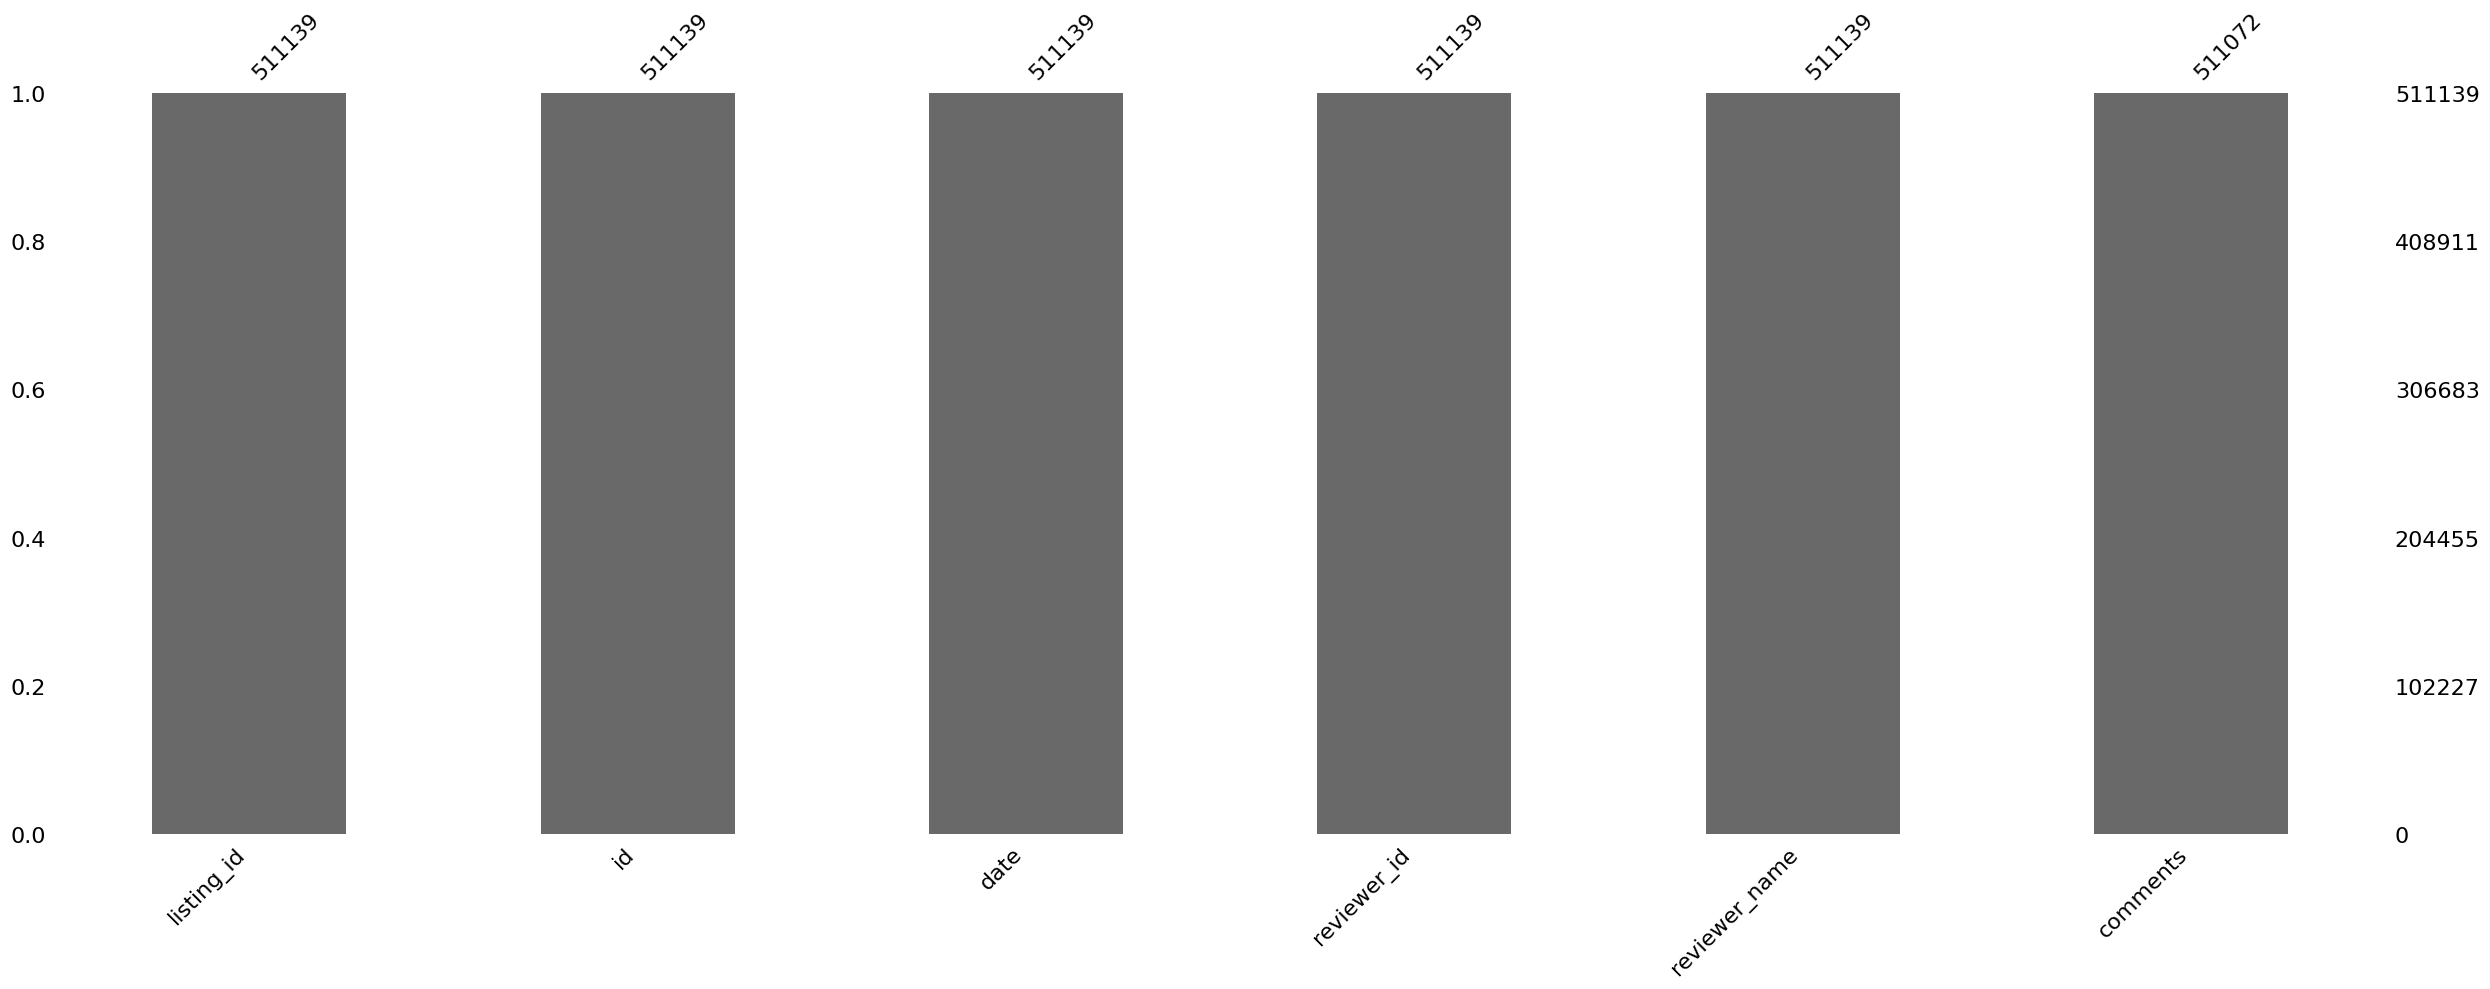

Null value information for listings
121208
id                                 0
name                               0
description                    20386
neighborhood_overview           9049
host_id                            0
host_name                          2
host_since                         2
host_location                   5098
host_about                     10683
host_response_time              6732
host_response_rate              6732
host_acceptance_rate            5425
host_is_superhost                227
host_listings_count                2
host_total_listings_count          2
host_identity_verified             2
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     8
beds                             496
price                           3791
availability_30                 

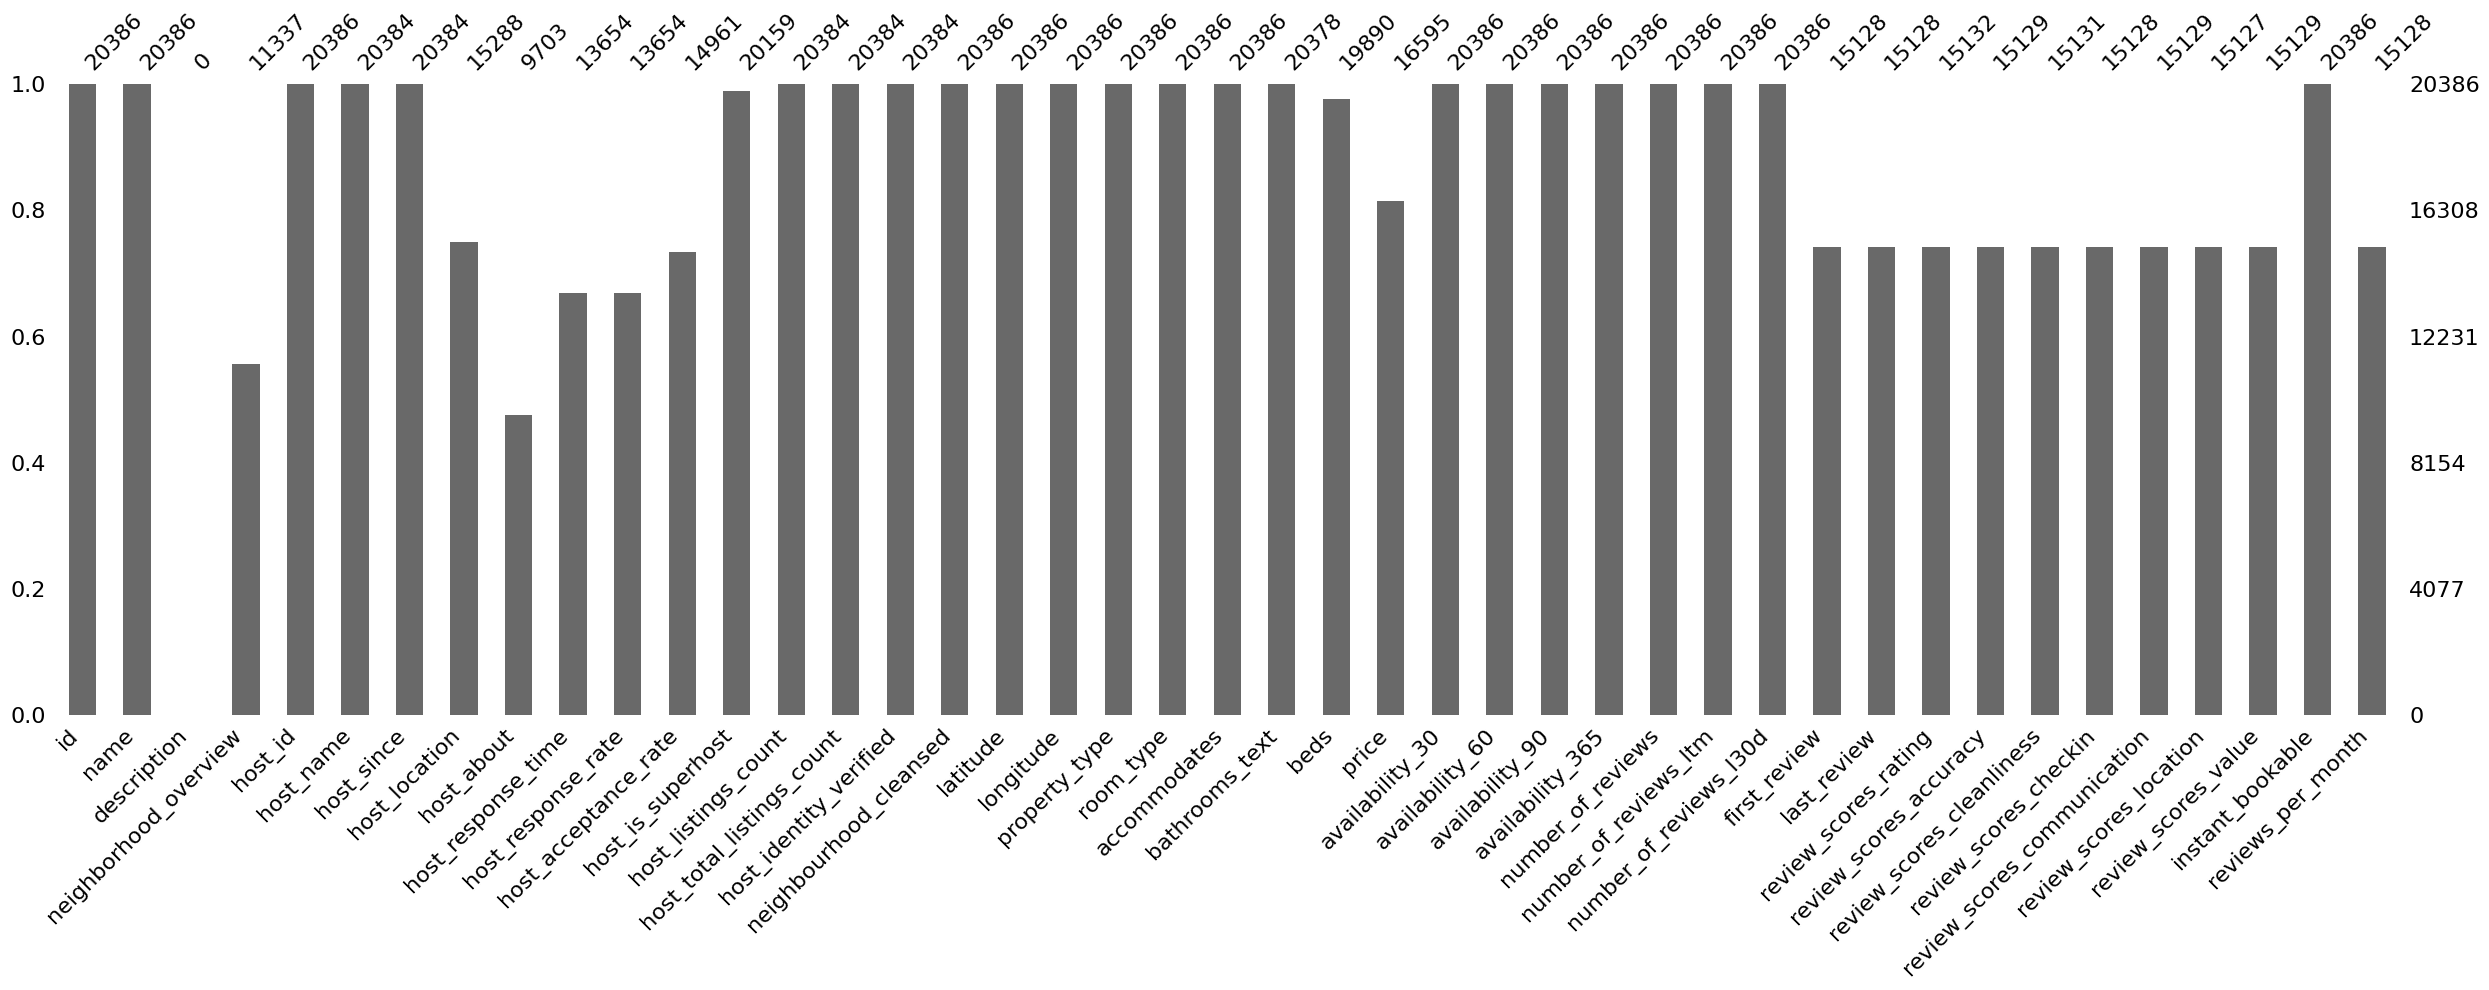

In [ ]:
# Explore the data
print("Preliminary Info for Toronto Reviews")
print(reviews_Toronto.head(10))  # Print the first few rows of the dataset
print("Shape of the data:")
print(reviews_Toronto.shape)
print("Data Info:")
print(reviews_Toronto.info())  # Get general information about the dataset
print("Data description:")
print(reviews_Toronto.describe(include = 'all'))  # Get descriptive statistics of the numerical columns


print("Preliminary Info for Toronto Listings")
print(listings_Toronto.head(10))  # Print the first few rows of the dataset
print("Shape of the data:")
print(listings_Toronto.shape)
print("Data Info:")
print(listings_Toronto.info())  # Get general information about the dataset
print("Data description:")
print(listings_Toronto.describe(include = 'all'))  # Get descriptive statistics of the numerical columns
print("Num unique neighbourhoods")
print(listings_Toronto["neighbourhood_cleansed"].value_counts())  # Get the count of values in a categorical column

# Identify null values
plt.figure(figsize=(10,35))
print("Null value information for reviews")
print(reviews_Toronto.isnull().values.sum())
print(reviews_Toronto.isna().sum())
msno.bar(reviews_Toronto)
plt.tight_layout()  # Adjust layout to fit everything without overlapping
plt.show()


print("Null value information for listings")
print(listings_Toronto.isnull().values.sum())
print(listings_Toronto.isna().sum())
msno.bar(listings_Toronto)
plt.tight_layout()  # Adjust layout to fit everything without overlapping
plt.show()



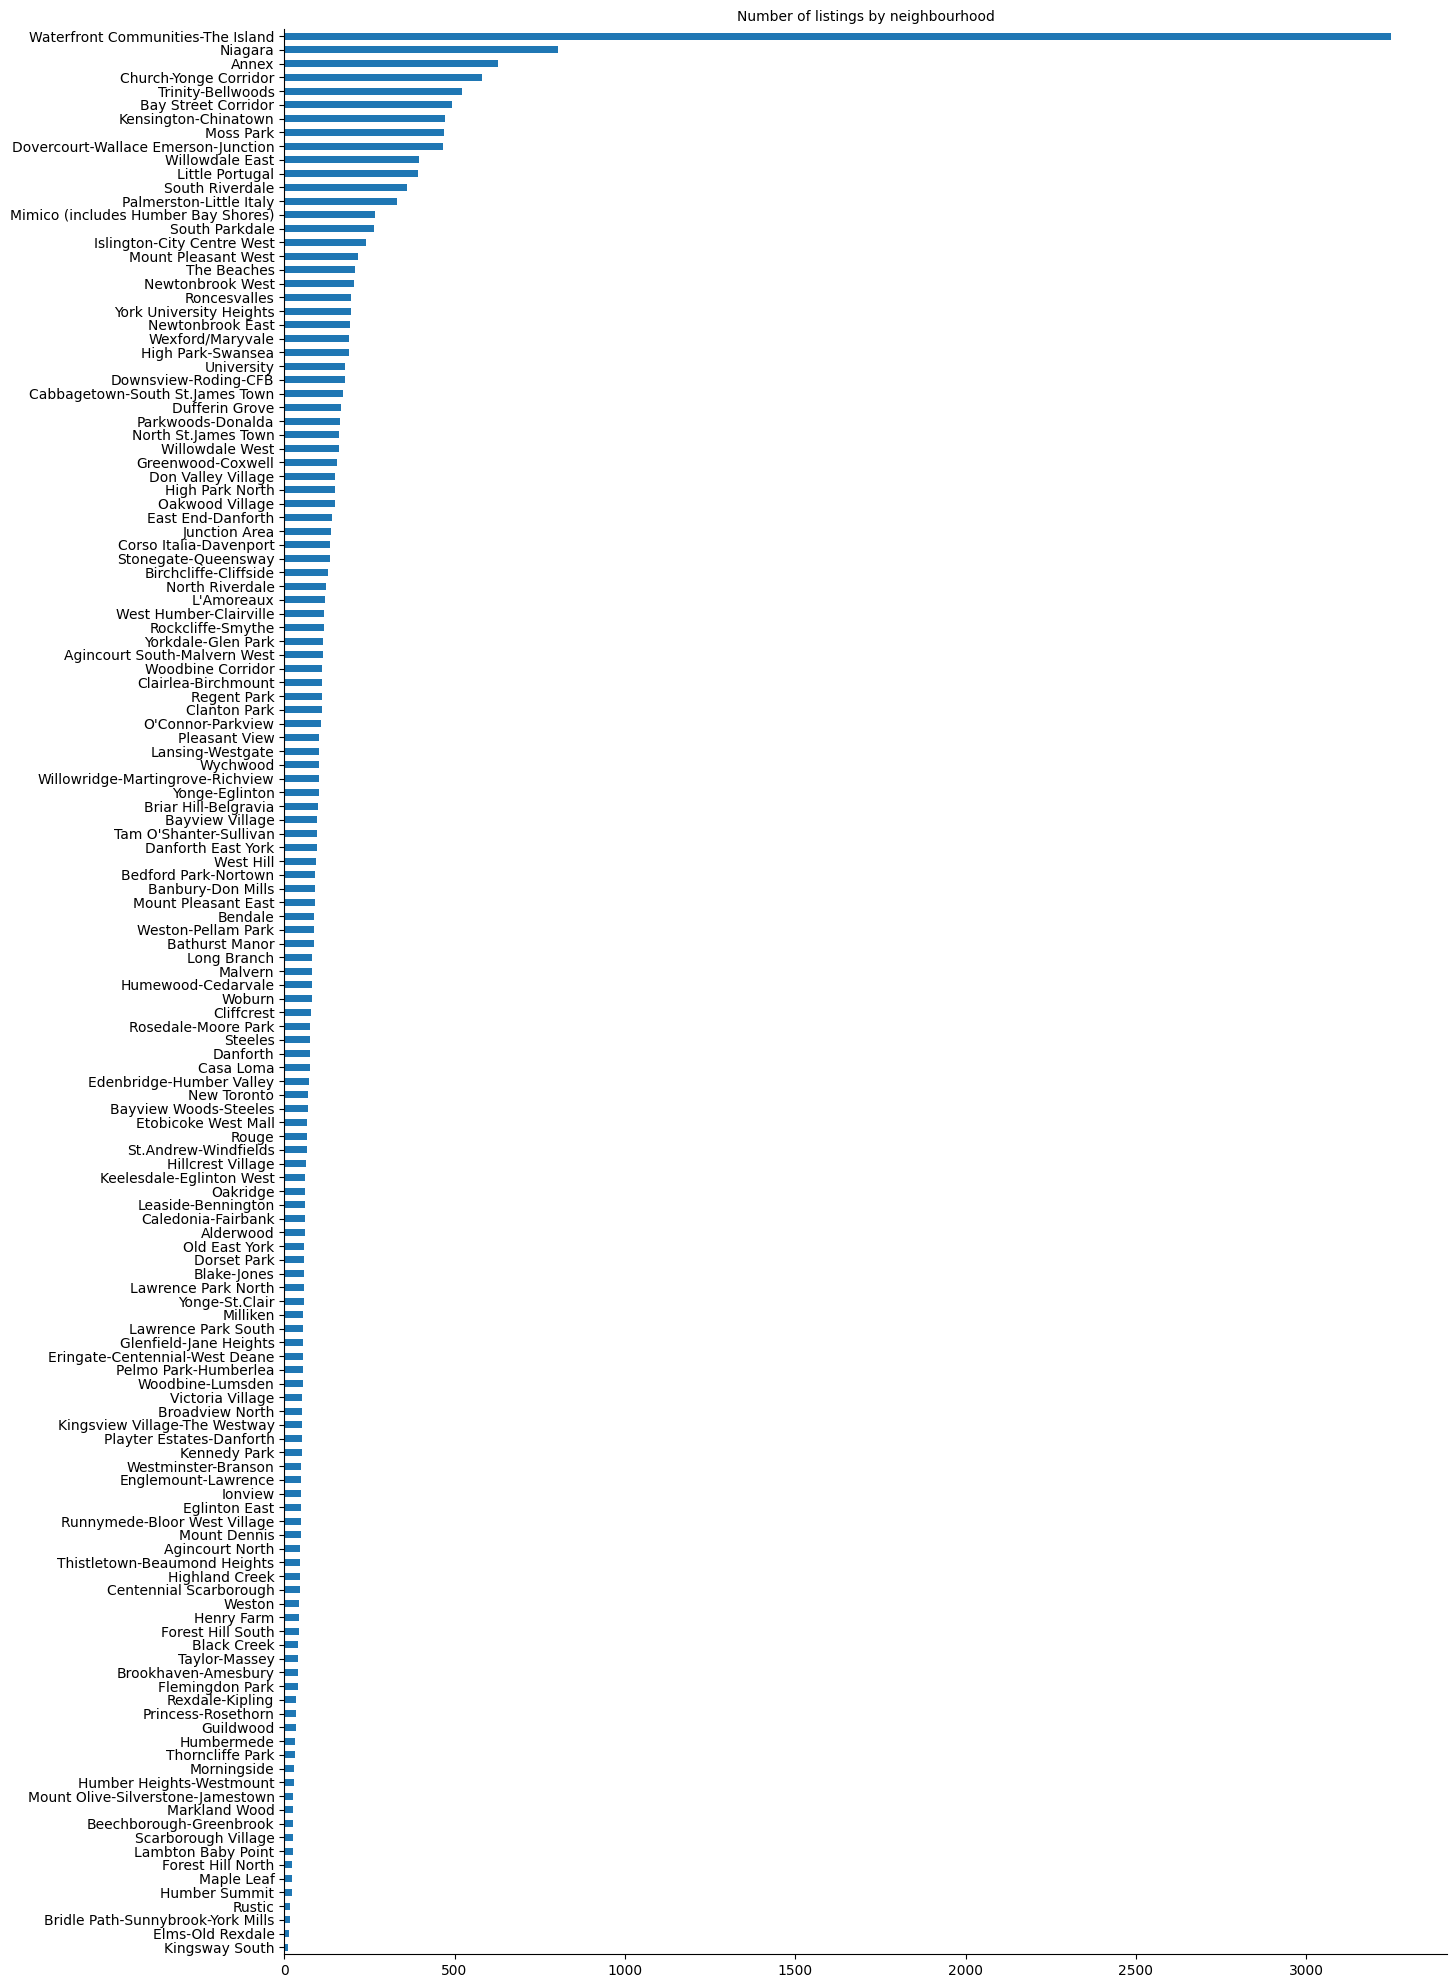

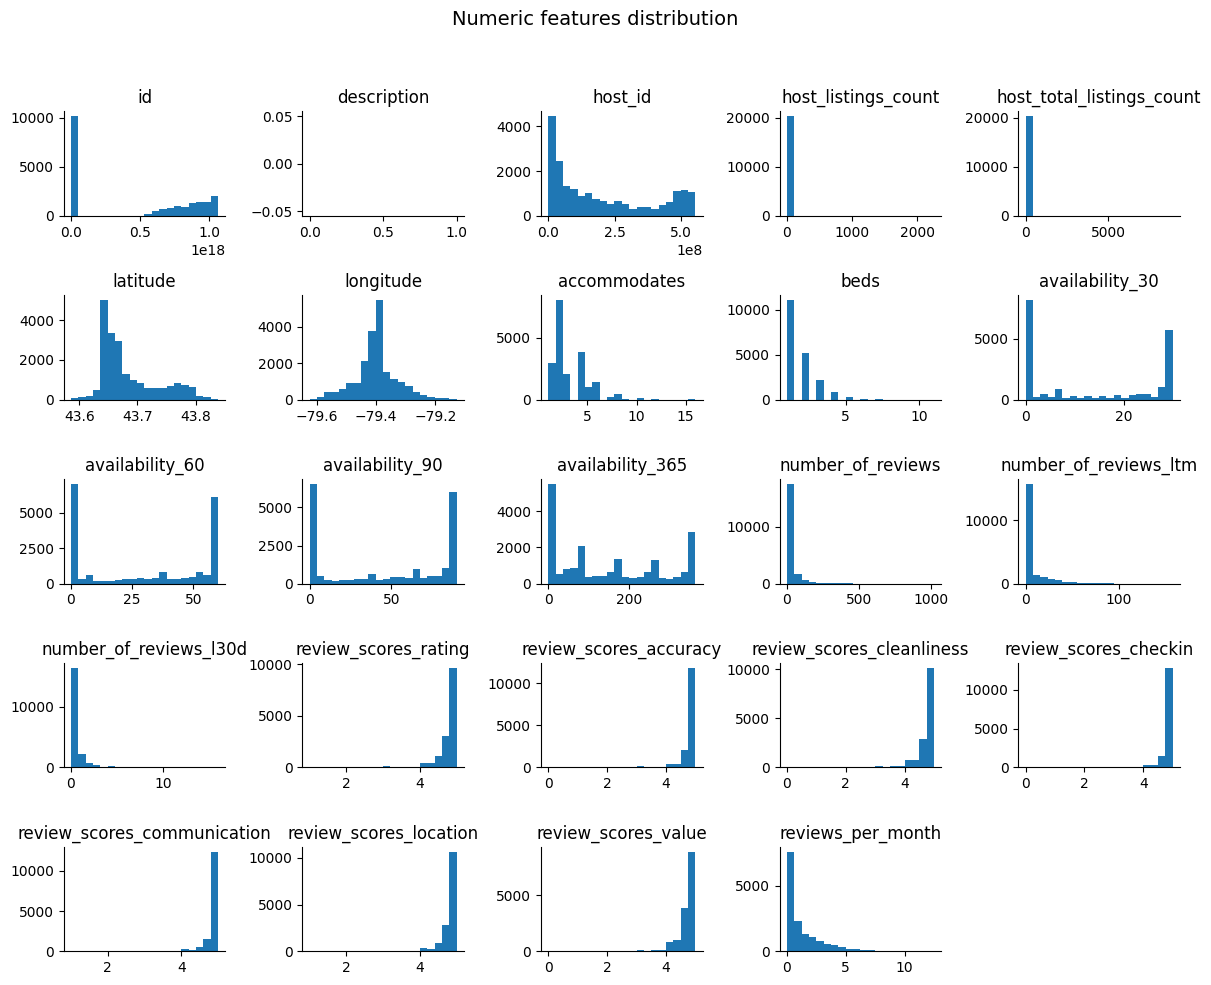

In [ ]:
#visualizations

listings_Toronto['neighbourhood_cleansed'].value_counts().sort_values().plot.barh(figsize=(15, 25));
sns.despine()
plt.title('Number of listings by neighbourhood', fontsize=10);

listings_Toronto.hist(figsize=(12, 10), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])


In [ ]:


# Define the review columns to be considered
review_cols = [
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

# Calculate the correlation matrix and transform it for Altair
result_df = listings_Toronto[review_cols].corr().reset_index().melt(id_vars='index').rename(columns={'index': 'Review Aspect', 'variable': 'Compared Aspect', 'value': 'Correlation'})

# Base chart for heatmap and text
base = alt.Chart(result_df, title='Review Scores Correlation Heatmap').properties(width=600, height=600)

# Heatmap
heatmap = base.mark_rect().encode(
    x=alt.X('Review Aspect:N', title=None),
    y=alt.Y('Compared Aspect:N', title=None),
    color='Correlation:Q'
)

# Text overlay for correlation values
text = base.mark_text(baseline='middle').encode(
    x=alt.X('Review Aspect:N', title=None),
    y=alt.Y('Compared Aspect:N', title=None),
    text=alt.Text('Correlation:Q', format='.2f'),
    color=alt.condition(
        alt.datum.Correlation < 0,
        alt.value('black'),  # Dark text for negative correlations
        alt.value('white')   # Light text for positive correlations
    )
)

# Combine heatmap and text, then configure the visual aspects
final_chart = (heatmap + text).configure_axis(
    labelAngle= 30,
    labelFontSize=12,
).configure_legend(
    orient='top',
    titleFontSize=14,
).configure_title(
    fontSize=18,
    offset=15,
    anchor='start',
    frame='group'
)

final_chart




alt.LayerChart(...)

Conclusions:



* There are strong positive correlations between value and accuracy, and communication and check-in.
  * Guests
*   The location score has a much lower positive relationship with all of the other scores
  * High scores on the location category



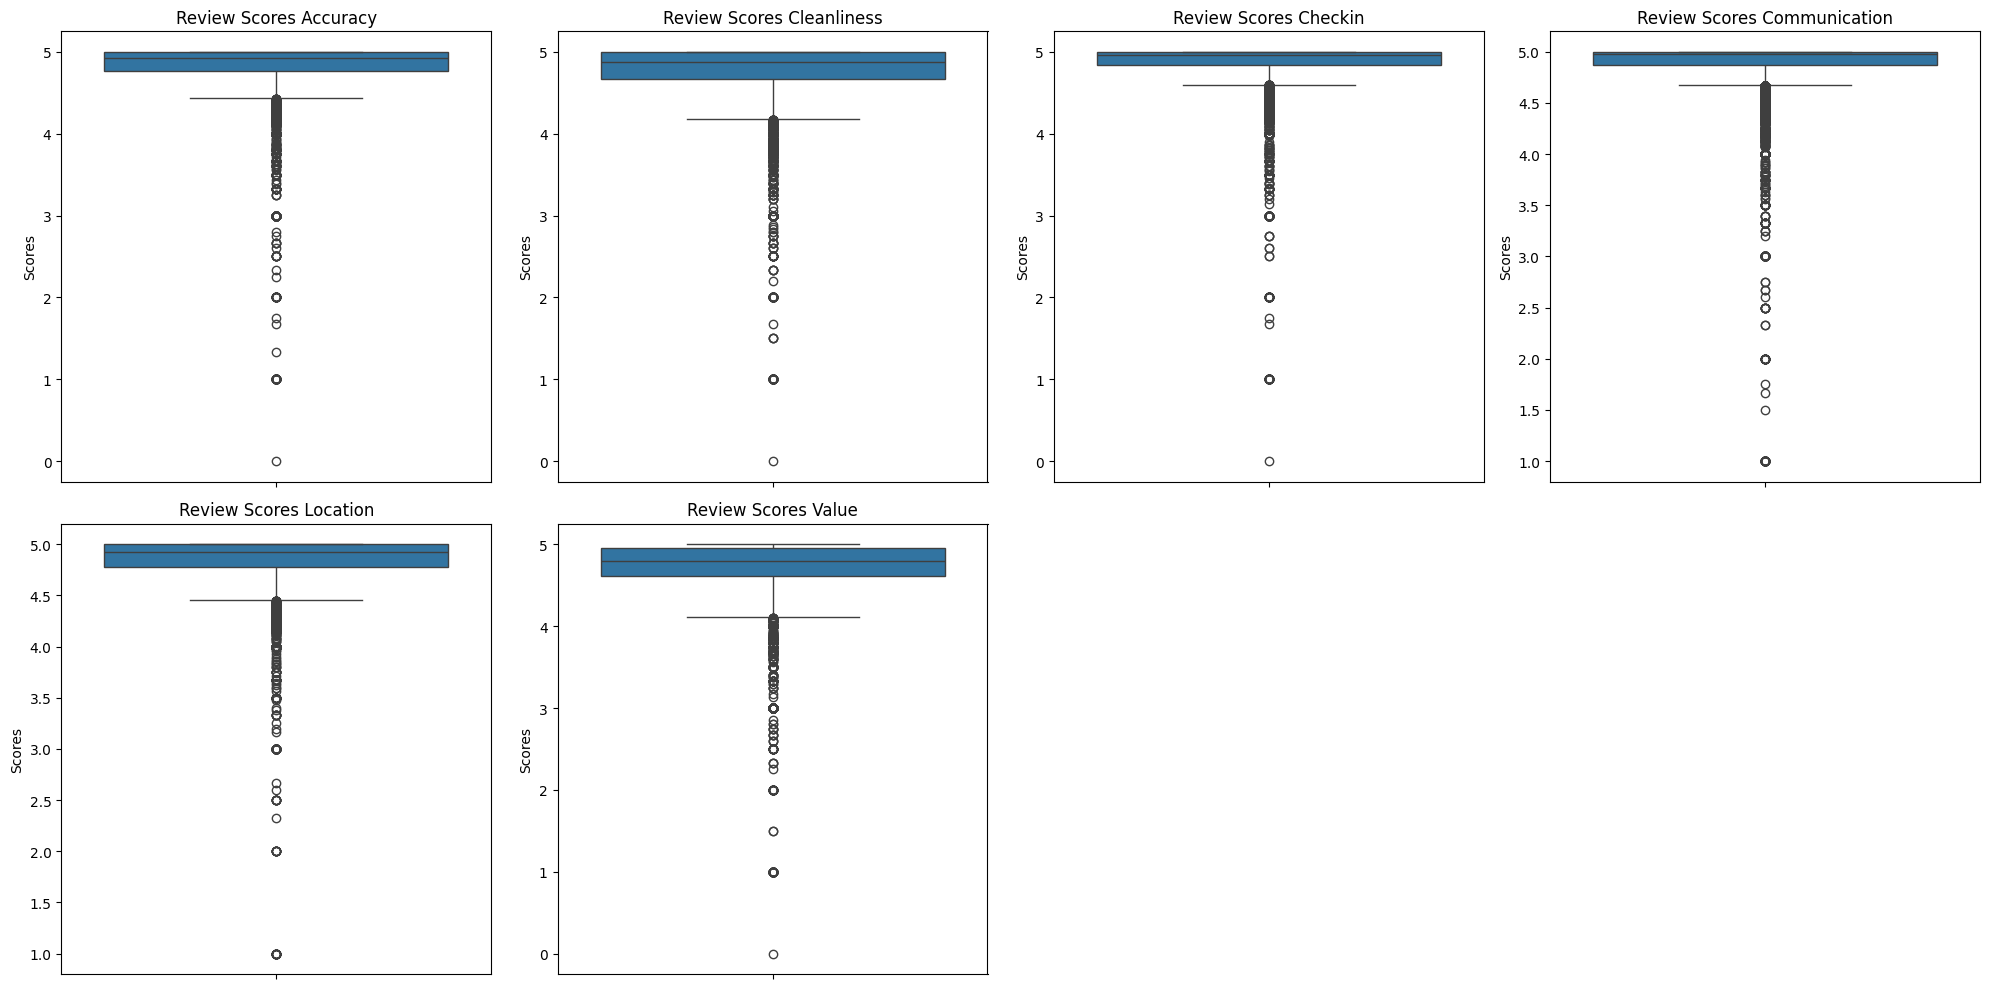

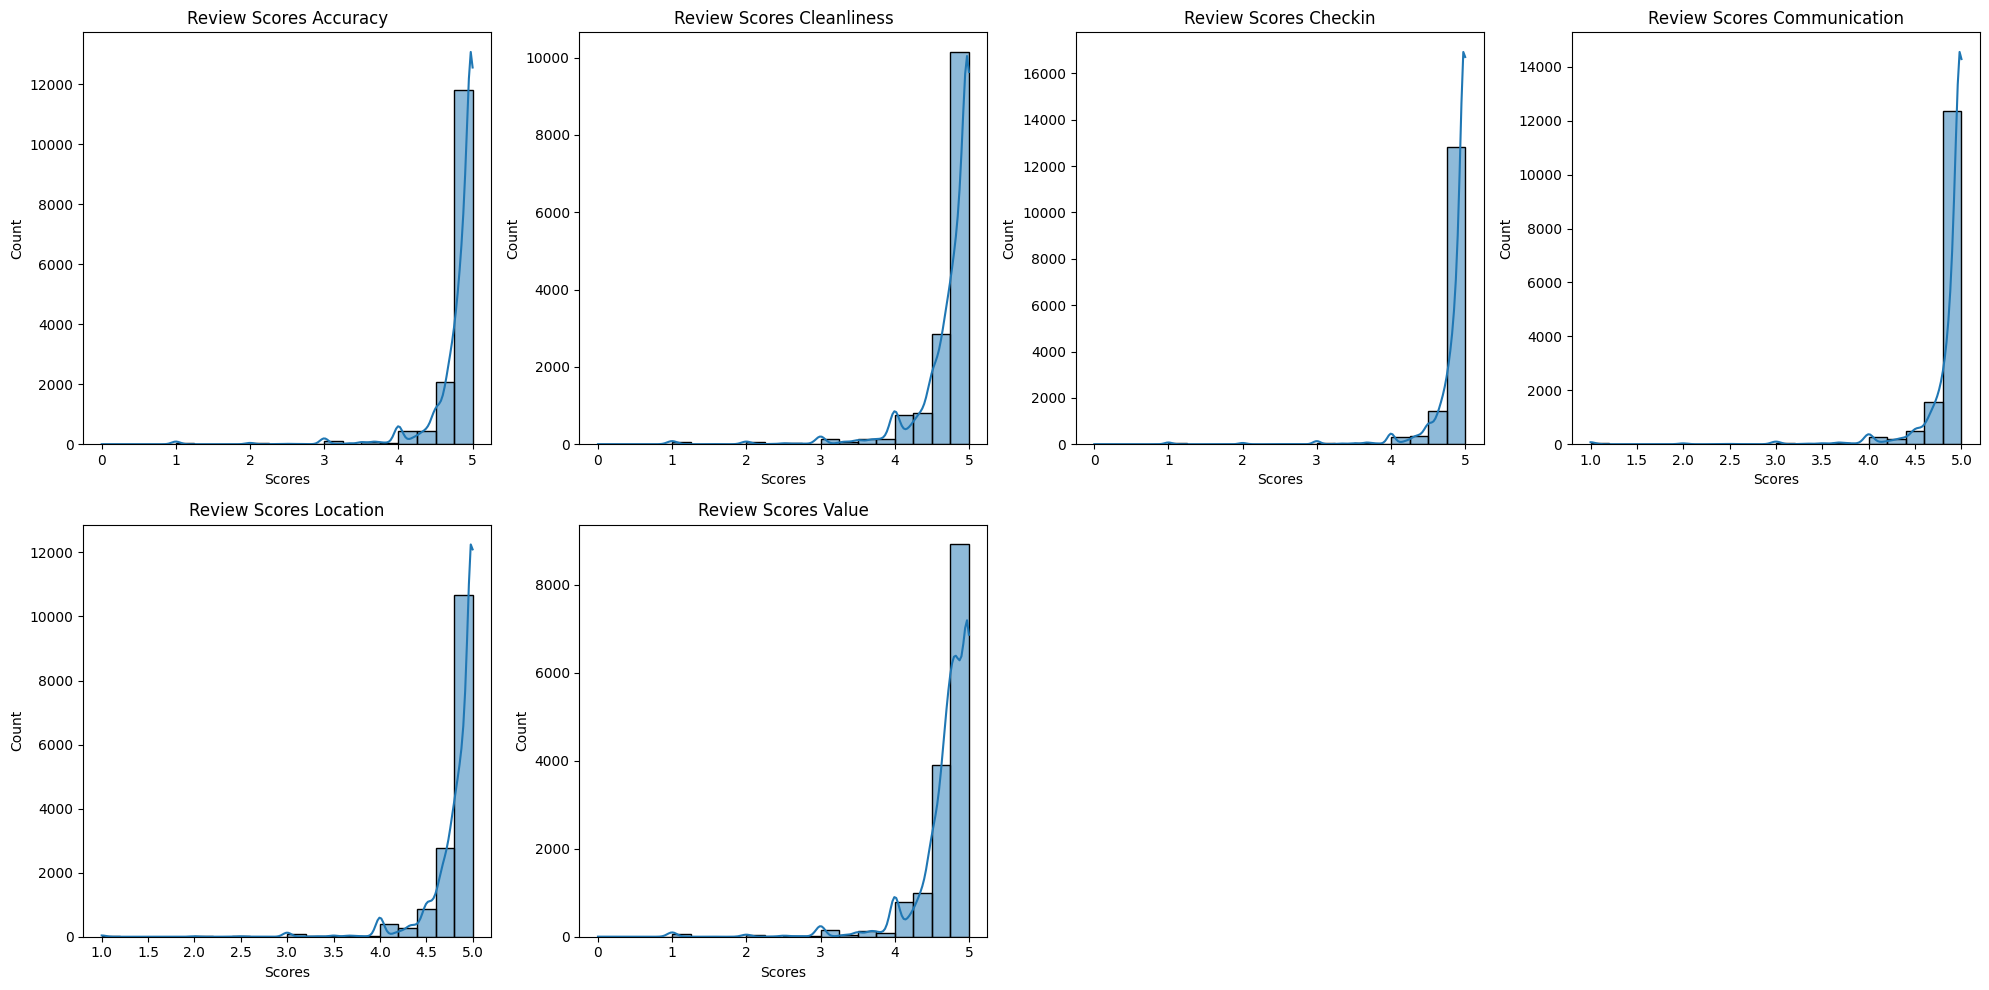

In [ ]:
# Create box plots for all specified review score columns
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
for i, col in enumerate(review_cols, 1):
    plt.subplot(2, 4, i)  # Adjust subplot grid as needed
    sns.boxplot(y=listings_Toronto[col])
    plt.title(col.replace('_', ' ').title())  # Makes title more readable
    plt.ylabel('Scores')
plt.tight_layout()
plt.show()

# Create distribution plots for all specified review score columns
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
for i, col in enumerate(review_cols, 1):
    plt.subplot(2, 4, i)  # Adjust subplot grid as needed
    sns.histplot(listings_Toronto[col], kde=True, bins=20)  # bins can be adjusted
    plt.title(col.replace('_', ' ').title())  # Makes title more readable
    plt.xlabel('Scores')
plt.tight_layout()
plt.show()

Prior lit shows that most people say only good things.

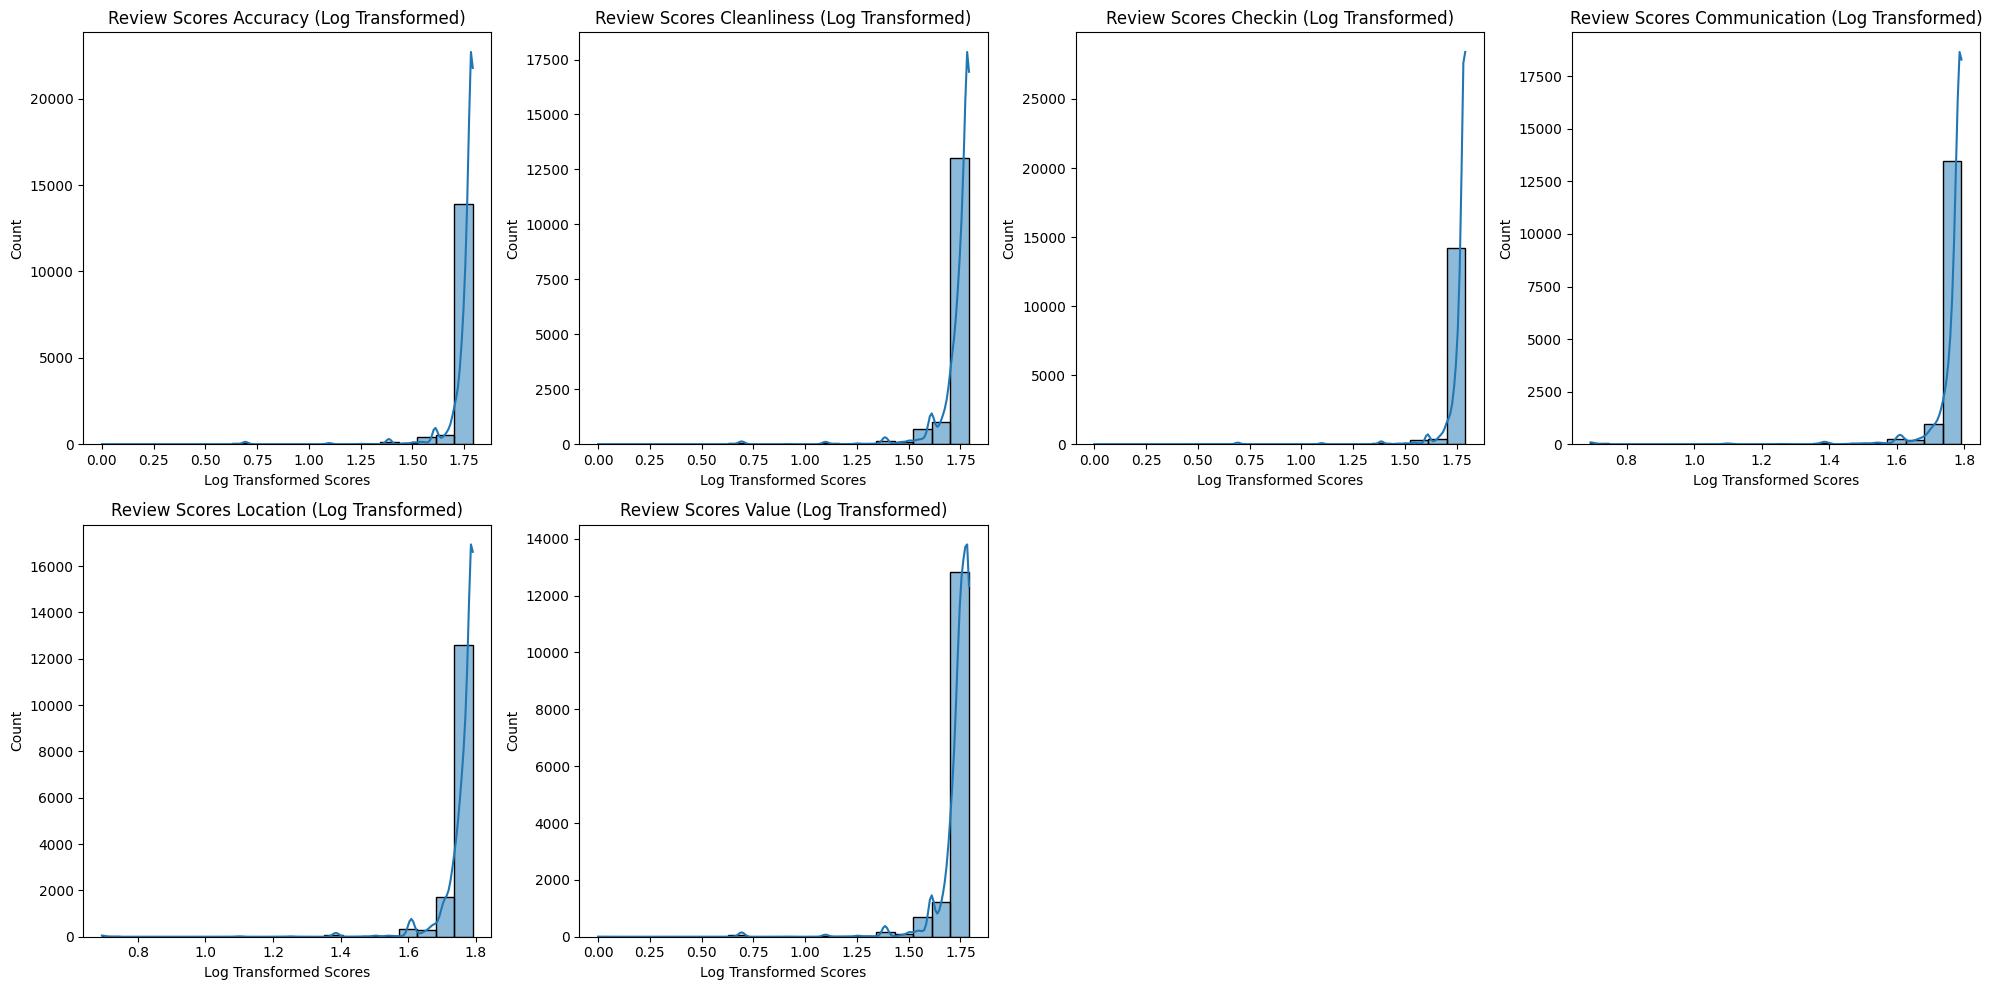

In [ ]:

# Apply log transformation (log(x + 1) to handle zeros)
for col in review_cols:
    listings_Toronto[col + '_log'] = np.log1p(listings_Toronto[col])

# Create distribution plots for all log-transformed review score columns
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
for i, col in enumerate(review_cols, 1):
    plt.subplot(2, 4, i)  # Adjust subplot grid as needed
    sns.histplot(listings_Toronto[col + '_log'], kde=True, bins=20)  # bins can be adjusted
    plt.title(col.replace('_', ' ').title() + ' (Log Transformed)')  # Makes title more readable
    plt.xlabel('Log Transformed Scores')
plt.tight_layout()
plt.show()

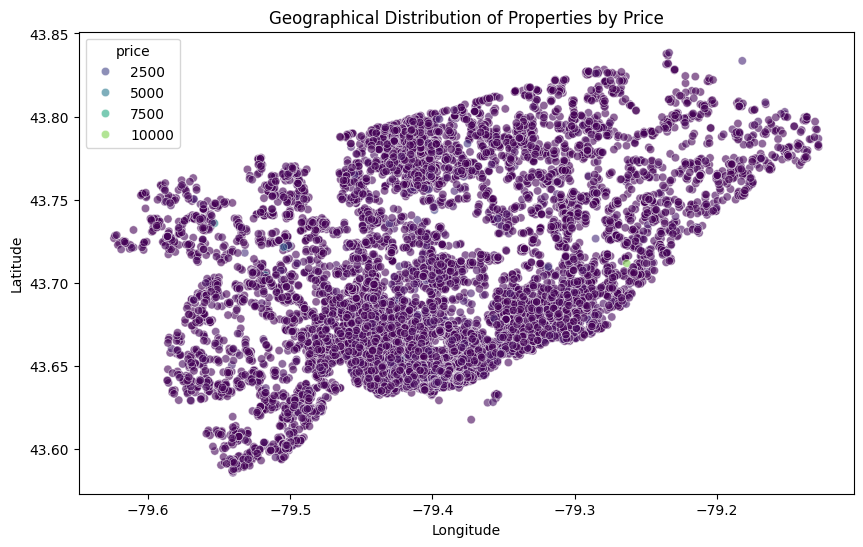

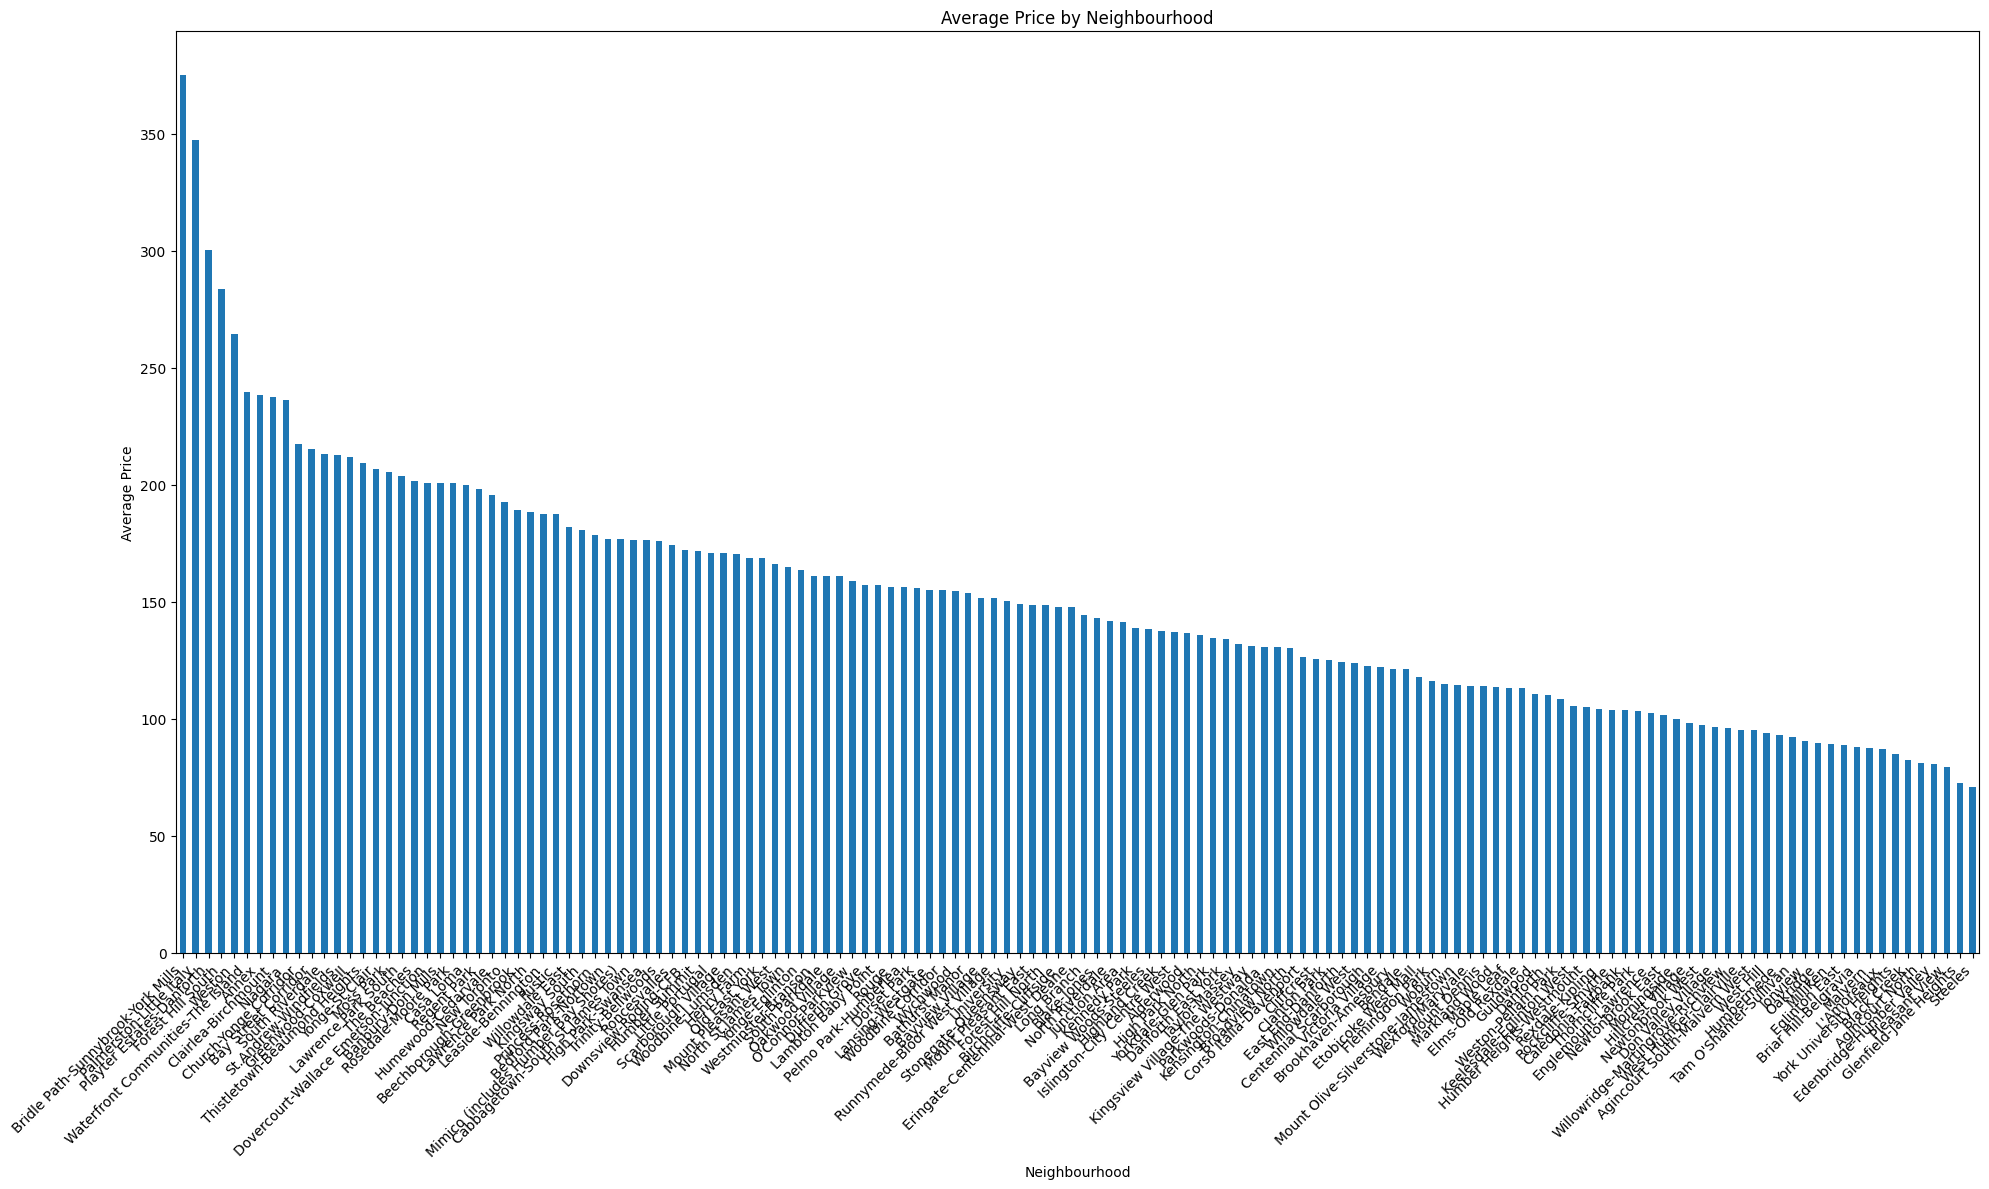

In [ ]:
# Convert price to a numeric value for analysis
listings_Toronto['price'] = listings_Toronto['price'].replace('[\$,]', '', regex=True).astype(float)

# Plotting geographical distribution of properties colored by price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=listings_Toronto, palette='viridis', alpha=0.6)
plt.title('Geographical Distribution of Properties by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Analyzing average price per neighbourhood_cleansed
avg_price_neighbourhood = listings_Toronto.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 12))
avg_price_neighbourhood.plot(kind='bar')
plt.title('Average Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
!pip install geopandas contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 48.6 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt




# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    merged_df,
    geometry=gpd.points_from_xy(merged_df.longitude, merged_df.latitude),
    crs='EPSG:4326'  # WGS 84 latitude-longitude projection
)

# Transform coordinates to match the web map tiles (usually Mercator projection)
gdf = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', marker='o', markersize=50)  # Customize point properties

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Adjust the limits to focus on Toronto if necessary
# Toronto approximate center in Mercator: x = -8839057, y = 5410463
ax.set_xlim(-8900000, -8780000)  # Adjust based on the extent of your data
ax.set_ylim(5370000, 5450000)

# Remove axis clutter
ax.set_axis_off()

plt.title('Booking Locations in Toronto by Category')
plt.show()



NameError: name 'merged_df' is not defined

Hypothesis Testing - Toronto, ON, Canada

HYPOTHESIS QUESTION: Is there a significant difference in the general review ratings for AirBnbs in the Northern VS Southern part of Toronto?

Null Hypothesis: There is no significant difference in the genral review ratings for AirBnbs in Northern and Southern Toronto.

Alternative Hypothesis: There is a significant difference between the general review ratings for AirBnbs in Northern and Southern Toronto.

REASONING: Through this hypothesis test, we wish to explore the data by analyzing whether or not the concentration of tourist attractions and of AirBnbs causes a significant change in the general review ratings, even with the same city. Since all group members of this project are familiar with Toronto, ON, Canada, and know that Southern Toronto has a much denser population of AirBnbs and tourist attractions, especially the Harbour Front, we wish to test our hypothesis of whether tourist attraction and AirBnb density affects review ratings—-even within the same city--with Toronto. Since more densely populated or visited areas tend to emphasize a more individualistic, brutally honest attitude, such as New York City having a much more blunt attitude than suburban cities, we expect the hypothesis test to return a significant difference between the general review ratings in the two areas.


In [ ]:
# Hypothesis Testing - Toronto, ON, Canada

print("HYPOTHESIS QUESTION: Is there a significant difference in the general review ratings for AirBnbs in the Northern VS Southern part of Toronto?")
print("Null Hypothesis: There is no significant difference in the genral review ratings for AirBnbs in Northern and Southern Toronto.")
print("Alternative Hypothesis: There is a significant difference between the general review ratings for AirBnbs in Northern and Southern Toronto.")


# Split data into two sets split down center latitude of toronto (43.5 degrees)
north_toronto = listings_Toronto[listings_Toronto['latitude'] >= 43.5]
south_toronto = listings_Toronto[listings_Toronto['latitude'] < 43.5]

# Filter out NaN from review score ratings and latitude columns
#north_toronto = north_toronto.dropna(subset=['latitude','review_scores_rating'])
#south_toronto = south_toronto.dropna(subset=['latitude','review_scores_rating'])


# First Hypothesis Test
print("HYPOTHESIS TEST:")
statistic, p_value = mannwhitneyu(north_toronto['review_scores_rating'], south_toronto['review_scores_rating'], alternative='two-sided')

# Printing Mann-Whitney U Test results
print("Mann-Whitney U Test Results:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance using the standard threshold of 0.05
if p_value < 0.05:
    print("There IS a significant difference in the distribution of review ratings in Northern and Southern Toronto.")
else:
    print("There is NO significant difference in the distribution of review ratings in Northern and Southern Toronto.")


HYPOTHESIS QUESTION: Is there a significant difference in the general review ratings for AirBnbs in the Northern VS Southern part of Toronto?
Null Hypothesis: There is no significant difference in the genral review ratings for AirBnbs in Northern and Southern Toronto.
Alternative Hypothesis: There is a significant difference between the general review ratings for AirBnbs in Northern and Southern Toronto.
HYPOTHESIS TEST:
Mann-Whitney U Test Results:
Test Statistic: nan
P-value: nan
There is NO significant difference in the distribution of review ratings in Northern and Southern Toronto.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import glob

# Concatenate all CSV files into one df
reviews_path = '/content/drive/MyDrive/CMPE372Project/reviews_Tor.csv'
listings_path = '/content/drive/MyDrive/CMPE372Project/listings_Tor.csv'

reviews_toronto = pd.read_csv(reviews_path)
listings_toronto = pd.read_csv(listings_path)
print(reviews_toronto.head(5))
print(listings_toronto.head(5))


   listing_id         id        date  reviewer_id reviewer_name  \
0        1419   38924112  2015-07-19     11308465       Marcela   
1        1419   44791978  2015-08-29      9580285         Marco   
2        1419   45957133  2015-09-07     38394721        Andrea   
3        1419   67295154  2016-03-28      3515044         Shaun   
4        1419  177702208  2017-08-03     13987100          Kate   

                                            comments  
0  Having the opportunity of arriving to Alexandr...  
1  We have no enough words to describe how beauty...  
2  The listing was exceptional and an even better...  
3  Alexandra's home was amazing and in such a nea...  
4  Beautiful home. Very comfortable and clean. Pe...  
             id                                       listing_url  \
0  2.401877e+07             https://www.airbnb.com/rooms/24018771   
1  5.068010e+07             https://www.airbnb.com/rooms/50680103   
2  1.018845e+18  https://www.airbnb.com/rooms/10188452239857

In [ ]:
#dropping unnessary columns
columns_to_drop = ['listing_url', 'source','picture_url', 'host_url', 'host_thumbnail_url',
                    'host_picture_url', 'host_name','host_since','host_location','host_response_time',
                   'host_listings_count','host_total_listings_count','host_identity_verified','host_has_profile_pic', 'amenities',
                   'property_type', 'bathrooms_text','number_of_reviews_l30d','first_review','last_review',''
                   'license', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed','scrape_id',
                   'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'calendar_updated', 'minimum_nights',
                   'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
                   'availability_30','availability_60','availability_90','availability_365','number_of_reviews_ltm',
                   'calendar_last_scraped', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'last_scraped','instant_bookable']

listings_toronto.drop(columns=columns_to_drop, inplace=True)

#Encode host_is_superhost, clean host_acceptance_rate and host_response_rate have % signs, room_type one-hot encoding,

In [ ]:
columns_to_drop = ['description']
listings_toronto.drop(columns=columns_to_drop, inplace=True)
listings_toronto.describe()
print(listings_toronto)

                 id                                               name  \
0      2.401877e+07  Home in Toronto · ★4.74 · 1 bedroom · 1 bed · ...   
1      5.068010e+07               Boat in Toronto · 1 bedroom · 1 bath   
2      1.018845e+18  Townhouse in Toronto · ★New · 1 bedroom · 1 be...   
3      8.429911e+17  Bed and breakfast in Toronto · ★4.67 · 1 bedro...   
4      1.004966e+18  Home in Toronto · ★4.73 · 1 bedroom · 4 beds ·...   
...             ...                                                ...   
20381  4.374074e+07  Condo in Toronto · ★4.88 · 1 bedroom · 1 bed ·...   
20382  1.469475e+07  Rental unit in Toronto · ★4.92 · 1 bedroom · 1...   
20383  9.551622e+17  Townhouse in Toronto · ★5.0 · 4 bedrooms · 5 b...   
20384  8.944069e+17  Rental unit in Toronto · ★4.51 · 2 bedrooms · ...   
20385  6.164494e+17  Condo in Toronto · ★4.96 · 1 bedroom · 1 bed ·...   

                                   neighborhood_overview    host_id  \
0                                       

In [ ]:
listings_toronto.dropna(inplace=True)
listings_toronto.describe()


,id,host_id,latitude,longitude,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3.766000e+03,3.766000e+03,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000,3766.000000
mean,3.145564e+17,1.393770e+08,43.678189,-79.400130,3.185874,1.775624,53.870420,4.825884,4.845743,4.790921,4.885266,4.897833,4.848008,4.730704,1.572106
std,4.036427e+17,1.612680e+08,0.044825,0.070629,1.995339,1.106710,80.284949,0.277687,0.277610,0.319496,0.248717,0.243035,0.241611,0.334523,1.659436
min,2.665400e+04,2.851500e+04,43.585750,-79.623950,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,2.222988e+07,1.722964e+07,43.646341,-79.433697,2.000000,1.000000,7.000000,4.770000,4.810000,4.710000,4.870000,4.890000,4.800000,4.670000,0.350000
50%,4.515454e+07,6.692486e+07,43.663538,-79.399477,2.000000,1.000000,24.000000,4.900000,4.920000,4.880000,4.950000,4.970000,4.910000,4.800000,0.980000
75%,7.580616e+17,2.101697e+08,43.694253,-79.371530,4.000000,2.000000,66.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.910000,2.310000
max,1.056592e+18,5.508467e+08,43.831460,-79.129560,16.000000,11.000000,1018.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.500000


In [ ]:
#reviews_toronto.drop(columns=['reviewer_name'],inplace=True)
print(reviews_toronto)
columns_to_drop_reviews = ['reviewer_name']
#reviews_toronto.drop(columns=columns_to_drop_reviews, inplace=True)

#Cleaning the dataset to remove the rows with <br/> in the coment row
# Identifying rows containing "<br/>" in the comments column
rows_to_drop = reviews_toronto[reviews_toronto['comments'].str.contains('<br/>', na=False)].index
reviews_toronto.drop(index=rows_to_drop, inplace=True)


print(reviews_toronto)
common_ids = reviews_toronto['listing_id'].isin(listings_toronto['id'])
print("Total number of common IDs:", common_ids.sum())

uncommon_ids = ~(reviews_toronto['listing_id'].isin(listings_toronto['id']))
print("Total number of uncommon IDs:", uncommon_ids.sum())

# Create a boolean mask indicating whether each 'listing_id' in reviews_toronto exists in the 'id' column of listings_toronto
mask = reviews_toronto['listing_id'].isin(listings_toronto['id'])

# Filter reviews_toronto based on the mask
reviews_toronto_filtered = reviews_toronto[mask]

# Optionally, reset the index of the filtered dataframe if needed
reviews_toronto_filtered.reset_index(drop=True, inplace=True)

# Display the filtered dataframe
print(reviews_toronto_filtered)

print(reviews_toronto)
common_ids = reviews_toronto_filtered['listing_id'].isin(listings_toronto['id'])
print("Total number of common IDs:", common_ids.sum())

reviews_toronto = reviews_toronto_filtered.copy()


                 listing_id                   id        date  reviewer_id  \
0                      1419             38924112  2015-07-19     11308465   
1                      1419             44791978  2015-08-29      9580285   
2                      1419             45957133  2015-09-07     38394721   
3                      1419             67295154  2016-03-28      3515044   
4                      1419            177702208  2017-08-03     13987100   
...                     ...                  ...         ...          ...   
511134  1052319083870161124  1060278841405099130  2024-01-02    488503452   
511135  1057929286925165858  1063800272543205518  2024-01-07    116898580   
511136  1053010334213066893  1060237917554723922  2024-01-02    218317215   
511137  1061704502413506115  1063069435771397497  2024-01-06    145523200   
511138  1053372809437539904  1058023623375101389  2023-12-30    334645233   

       reviewer_name                                           comments  
0

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


# Using code from InstructABSA - UPDATE THIS

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
import numpy as np

# Load a pre-trained language model,
nlp = spacy.load('en_core_web_md')  # Load the English tokenizer, tagger, parser, and NER

# Function to filter comments based on token length
def filter_comments(comment):
    if isinstance(comment, str):
        # Tokenize the comment
        doc = nlp(comment)
        # Check the number of tokens
        if len(doc) < 512:
            return comment
    return None

# Apply the filter_comments function to the 'comments' column
reviews_toronto['comments'] = reviews_toronto['comments'].apply(filter_comments)

# Drop rows where comments are None (token length >= 512)
reviews_toronto.dropna(subset=['comments'], inplace=True)

# Reset the index if needed
reviews_toronto.reset_index(drop=True, inplace=True)
# Get the number of rows in the dataframe
num_rows = reviews_toronto.shape[0]

# Print the number of rows
print("Number of rows in the dataset:", num_rows)

tokenizer = AutoTokenizer.from_pretrained("kevinscaria/joint_tk-instruct-base-def-pos-neg-neut-restaurants")
model = AutoModelForSeq2SeqLM.from_pretrained("kevinscaria/joint_tk-instruct-base-def-pos-neg-neut-restaurants")

bos_instruction = """Definition: The output will be the aspects (both implicit and explicit) and the aspects sentiment polarity. In cases where there are no aspects the output should be noaspectterm:none.
    Positive example 1-
    input: Location was fantastic.
    output: location:positive,
    Positive example 2-
    input: The apartment was clean and bright, it was a perfect experience!
    output: apartment:positive, experience:positive
    Negative example 1-
    input: The apartment is very bad.
    output: apartment:negative
    Negative example 2-
    input: Communication with host was impossible.
    output: communication:negative
    Now complete the following example-
    input: """
delim_instruct = ''
eos_instruct = ' \noutput:'

# Predefined category centroids (example words for each category)
categories = {
    'location': ['neighbourhood', 'area', 'accessibility', 'view', 'proximity'],
    'cleanliness': ['maintainance', 'neat', 'hygiene', 'bathroom', 'kitchen'],
    'accuracy' : ['size', 'apartment', 'stay', 'house', 'room'],
    'check-in' : ['reception', 'ease of access'],
    'communication' : ['host', 'responsiveness', 'clarity', 'helpfulness'],
    'value' : ['price', 'cost' ]
}

# Calculate centroid vectors for each category
centroids = {}
for category, words in categories.items():
    # Compute the mean vector for the given words
    centroid = np.mean([nlp(word).vector for word in words], axis=0)
    centroids[category] = centroid

# Function to classify a new word
def classify_word(word):
    word_vec = nlp(word).vector
    # Calculate distances to each centroid
    distances = {category: np.linalg.norm(word_vec - centroid) for category, centroid in centroids.items()}
    # Return the category with the minimum distance
    return min(distances, key=distances.get)

# Assuming you have initialized `results` as an empty list and defined `tokenizer`, `model`, and `reviews_toronto` earlier

results = []

count = 0

for index, row in reviews_toronto.iterrows():
    text = row['comments']  # Get the comment text
    listing_id = row['listing_id']  # Get the listing_id associated with the review
    # Tokenize the text
    tokenized_text = tokenizer(bos_instruction + text + delim_instruct + eos_instruct, return_tensors="pt")
    # Generate model output
    output = model.generate(tokenized_text.input_ids)
    # Decode the model output
    decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)

    print("Line :" , count)
    count +=1

    # Extract aspects and classify them into categories
    aspects = decoded_output.split(', ')
    aspect_categories = {}
    for category in categories.keys():
        aspect_categories[category] = -1  # Initialize all aspects as not extracted
    for aspect in aspects:
        word = aspect.split(':')[0].strip()
        category = classify_word(word)
        if 'positive' in aspect:
            aspect_categories[category] = 1
        else:
            aspect_categories[category] = 0

    # Append the comment, model output, and aspect categories to the results list
    results.append({'listing_id': listing_id, 'Comment': text, 'decoded_model_output': decoded_output, **aspect_categories})

# Create DataFrame from results list

# Create DataFrame from results list
results_df = pd.DataFrame(results)


'import pandas as pd\nimport spacy\nimport numpy as np\n\n# Load a pre-trained language model, \nnlp = spacy.load(\'en_core_web_md\')  # Load the English tokenizer, tagger, parser, and NER\n\n# Function to filter comments based on token length\ndef filter_comments(comment):\n    if isinstance(comment, str):\n        # Tokenize the comment\n        doc = nlp(comment)\n        # Check the number of tokens\n        if len(doc) < 512:\n            return comment\n    return None\n\n# Apply the filter_comments function to the \'comments\' column\nreviews_toronto[\'comments\'] = reviews_toronto[\'comments\'].apply(filter_comments)\n\n# Drop rows where comments are None (token length >= 512)\nreviews_toronto.dropna(subset=[\'comments\'], inplace=True)\n\n# Reset the index if needed\nreviews_toronto.reset_index(drop=True, inplace=True)\n# Get the number of rows in the dataframe\nnum_rows = reviews_toronto.shape[0]\n\n# Print the number of rows\nprint("Number of rows in the dataset:", num_rows)

In [ ]:
print(results_df)
results_df.to_csv('results_data.csv', index=False)


In [ ]:
#CODE TO ANSWER RQ2

import re
from collections import Counter
import matplotlib.pyplot as plt

# Function to extract raw aspects from decoded output
def extract_raw_aspects(decoded_output):
    # Split decoded output into aspects
    aspects = decoded_output.split(', ')
    raw_aspects = []
    # Extract raw aspects without sentiment
    for aspect in aspects:
        raw_aspect = re.sub(r':[a-z]+', '', aspect).strip()
        raw_aspects.append(raw_aspect)
    return raw_aspects

# Apply the function to extract raw aspects
results_df['raw_aspects'] = results_df['decoded_model_output'].apply(extract_raw_aspects)

# Process raw aspects to create bag of words
bag_of_words = Counter()
for raw_aspects in results_df['raw_aspects']:
    bag_of_words.update(raw_aspects)

bag_of_words_df = pd.DataFrame(bag_of_words.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
bag_of_words_df = bag_of_words_df.sort_values(by='Frequency', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(bag_of_words_df['Word'], bag_of_words_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Bag of Words')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent words on top
plt.show()

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud from the bag of words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bag_of_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of the Extracted Aspects')
plt.show()


In [ ]:
# MAAHUMS DATA VISUALIZATION WORK pls dont delete

# Perform left join on result_data and listings_toronto
# Merge the two dataframes on 'listing_id' and 'id'


# Select the desired columns and create a new dataframe
geo_results_df = pd.merge(results_df, listings_toronto[['id', 'latitude', 'longitude']], left_on='listing_id', right_on='id', how='left')

# Drop the redundant 'id' column from listings_Toronto
geo_results_df.drop(columns='id', inplace=True)
# Display the new dataframe
print(geo_results_df)
#results_with_coords = pd.merge(results_df, listings_toronto[['id', 'longitude', 'latitude']], left_on='listing_id', right_on='id', how='left')
#common_ids = set(results_with_coords['listing_id']).intersection(set(listings_toronto['id']))
#print("Number of common IDs:", len(common_ids))



# Print the resulting DataFrame
#print(results_df.head())
#print(listings_toronto.head())
#print(results_with_coords.head())

In [ ]:


# Get unique values from the 'id' column
unique_ids = reviews_toronto['id'].unique()

# Convert the unique values to a numpy array
unique_ids_array = np.array(unique_ids)

# Print the array to see the output
print(unique_ids_array)
